📈 Évaluation du modèle Lasso :
MAE : 124830.52
RMSE : 354901.08
R² : 0.8095


<ipython-input-2-99e747c68ebe>:73: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


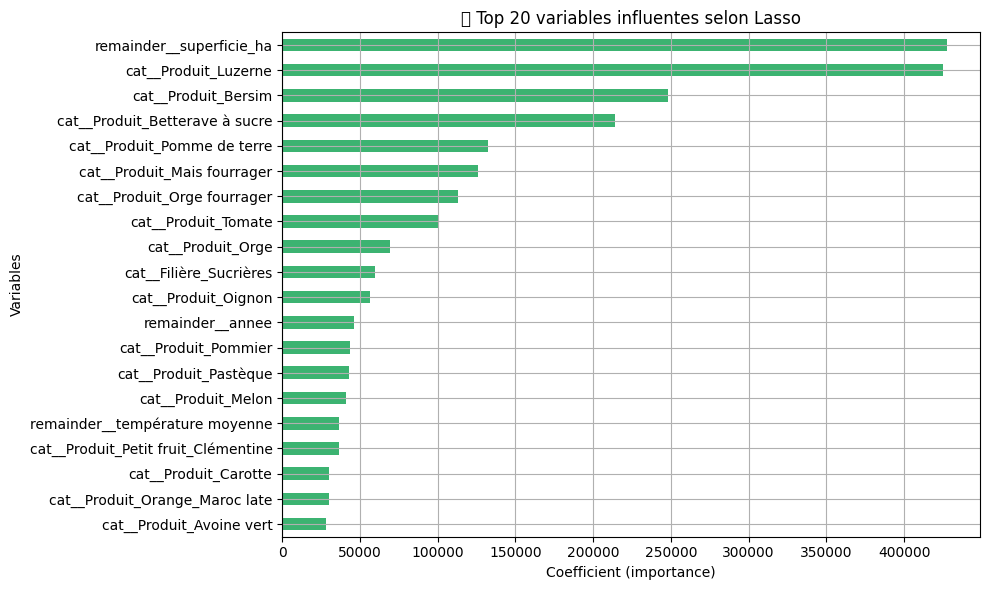

In [2]:
# 📌 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📥 Charger les données
df = pd.read_csv("donnees_finales_datadriven.csv")

# 🧹 Nettoyage NaN et inf
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# 🎯 Définir X et y
X = df.drop(columns=['production_tonnes'])
y = df['production_tonnes']

# 🔍 Colonnes catégorielles
cat_cols = X.select_dtypes(include='object').columns.tolist()

# ⚙️ Prétraitement
preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols),
], remainder='passthrough')

# 🧠 Pipeline LassoCV avec standardisation
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("scaler", StandardScaler(with_mean=False)),  # obligatoire si OneHotEncoder génère sparse matrix
    ("lasso", LassoCV(cv=5, random_state=42))
])

# 🔀 Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Entraînement
model.fit(X_train, y_train)

# 📊 Prédictions
y_pred = model.predict(X_test)

# 🧮 Évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("📈 Évaluation du modèle Lasso :")
print("MAE :", round(mae, 2))
print("RMSE :", round(rmse, 2))
print("R² :", round(r2, 4))

# 📌 Extraire l’importance des variables (coefficients)
# On accède au modèle interne via model.named_steps['lasso']
lasso = model.named_steps['lasso']
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
coef = pd.Series(lasso.coef_, index=feature_names)

# 🔝 Afficher les 20 variables les plus importantes
top_coef = coef_non_zero.abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_coef.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title("🔍 Top 20 variables influentes selon Lasso")
plt.xlabel("Coefficient (importance)")
plt.ylabel("Variables")
plt.grid(True)
plt.tight_layout()
plt.show()



